In [2]:
import json
import re

file_path = "C:/Users/simon/OneDrive/Desktop/Advanced Machine Learning/NLP/Group_project/train-v2.0.json"
with open(file_path, 'r') as file:
    data = json.load(file)
    text_data = data["data"]
    paragraphs = [paragraph["context"] for topic in text_data for paragraph in topic["paragraphs"]]
    
    # Extract questions and answers, handling cases where "answers" list is empty
    questions = []
    answers = []
    for topic in text_data:
        for paragraph in topic["paragraphs"]:
            for question in paragraph["qas"]:
                # Check if "answers" list is not empty before accessing its elements
                if question["answers"]:
                    questions.append(question["question"])
                    answers.append(question["answers"][0]["text"])
                else:
                    # Handle the case where "answers" list is empty
                    questions.append(question["question"])
                    answers.append("No answer available")


In [3]:
#remove spaces
paragraphs = [re.sub('\n', ' ', doc) for doc in paragraphs]
questions = [re.sub('\n', ' ', question) for question in questions]
answers = [re.sub('\n', ' ', answer) for answer in answers]
#remove email(probably not useful)
paragraphs = [re.sub('[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', doc) for doc in paragraphs]
questions = [re.sub('[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', question) for question in questions]
answers = [re.sub('[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', '', answer) for answer in answers]
# split sentences
sentences_par = [re.split('[?!.]\s', doc) for doc in paragraphs]
sentences_que = [re.split('[?!.]\s', question) for question in questions]
sentences_ans = [re.split('[?!.]\s', answer) for answer in answers]

print("Paragraphs:\n", paragraphs[:3])
print("\nQuestions:\n", questions[:3])
print("\nAnswers:\n", answers[:3])

Paragraphs:
 ['Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".', 'Following the disbandment of Destiny\'s Child in June 2005, she released her second solo album, B\'Day (2006), which contained hits "Déjà Vu", "Irreplaceable", and "Beautiful Liar". Beyoncé also ventured into acting, with a Golden Globe-nominated performance in Dreamgirls (2006), and

In [4]:
from pandas.core.common import flatten
#flatten the structure to 3 big array of phrase
sentences_par = list(flatten(sentences_par))
sentences_que= list(flatten(sentences_que))
sentences_ans = list(flatten(sentences_ans))

sentences_par[:5]
sentences_ans[:5]
sentences_que[:5]

['When did Beyonce start becoming popular?',
 'What areas did Beyonce compete in when she was growing up?',
 "When did Beyonce leave Destiny's Child and become a solo singer?",
 'In what city and state did Beyonce  grow up',
 '']

In [5]:
#Data cleaning
tokenized_sentences_par = [re.sub('\W', ' ', sentence).lower().split() for sentence in sentences_par]
tokenized_sentences_que = [re.sub('\W', ' ', sentence).lower().split() for sentence in sentences_que]
tokenized_sentences_ans = [re.sub('\W', ' ', sentence).lower().split() for sentence in sentences_ans]
# remove sentences that are only 1 word long
tokenized_sentences_par = [sentence for sentence in tokenized_sentences_par if len(sentence) > 1]
tokenized_sentences_que = [sentence for sentence in tokenized_sentences_que if len(sentence) > 1]
tokenized_sentences_ans = [sentence for sentence in tokenized_sentences_ans if len(sentence) > 1]

#Not sure if it is right or not (sentences all togheter)
all_tokenized_sentences = tokenized_sentences_par + tokenized_sentences_que +tokenized_sentences_ans
for sentence in all_tokenized_sentences[:10]:
    print(sentence)

['beyoncé', 'giselle', 'knowles', 'carter', 'biːˈjɒnseɪ', 'bee', 'yon', 'say', 'born', 'september', '4', '1981', 'is', 'an', 'american', 'singer', 'songwriter', 'record', 'producer', 'and', 'actress']
['born', 'and', 'raised', 'in', 'houston', 'texas', 'she', 'performed', 'in', 'various', 'singing', 'and', 'dancing', 'competitions', 'as', 'a', 'child', 'and', 'rose', 'to', 'fame', 'in', 'the', 'late', '1990s', 'as', 'lead', 'singer', 'of', 'r', 'b', 'girl', 'group', 'destiny', 's', 'child']
['managed', 'by', 'her', 'father', 'mathew', 'knowles', 'the', 'group', 'became', 'one', 'of', 'the', 'world', 's', 'best', 'selling', 'girl', 'groups', 'of', 'all', 'time']
['their', 'hiatus', 'saw', 'the', 'release', 'of', 'beyoncé', 's', 'debut', 'album', 'dangerously', 'in', 'love', '2003', 'which', 'established', 'her', 'as', 'a', 'solo', 'artist', 'worldwide', 'earned', 'five', 'grammy', 'awards', 'and', 'featured', 'the', 'billboard', 'hot', '100', 'number', 'one', 'singles', 'crazy', 'in', '

In [6]:
all_words = [word for sentence in all_tokenized_sentences for word in sentence]


# Create a set to get unique words
unique_words = set(all_words)

# Get the length of the vocabulary
vocab_length = len(unique_words)

# Print the length of the vocabulary
print("Vocabulary Length:", vocab_length)
print(all_words[:100])

Vocabulary Length: 84893
['beyoncé', 'giselle', 'knowles', 'carter', 'biːˈjɒnseɪ', 'bee', 'yon', 'say', 'born', 'september', '4', '1981', 'is', 'an', 'american', 'singer', 'songwriter', 'record', 'producer', 'and', 'actress', 'born', 'and', 'raised', 'in', 'houston', 'texas', 'she', 'performed', 'in', 'various', 'singing', 'and', 'dancing', 'competitions', 'as', 'a', 'child', 'and', 'rose', 'to', 'fame', 'in', 'the', 'late', '1990s', 'as', 'lead', 'singer', 'of', 'r', 'b', 'girl', 'group', 'destiny', 's', 'child', 'managed', 'by', 'her', 'father', 'mathew', 'knowles', 'the', 'group', 'became', 'one', 'of', 'the', 'world', 's', 'best', 'selling', 'girl', 'groups', 'of', 'all', 'time', 'their', 'hiatus', 'saw', 'the', 'release', 'of', 'beyoncé', 's', 'debut', 'album', 'dangerously', 'in', 'love', '2003', 'which', 'established', 'her', 'as', 'a', 'solo', 'artist', 'worldwide']


Text(0, 0.5, 'Frequency')

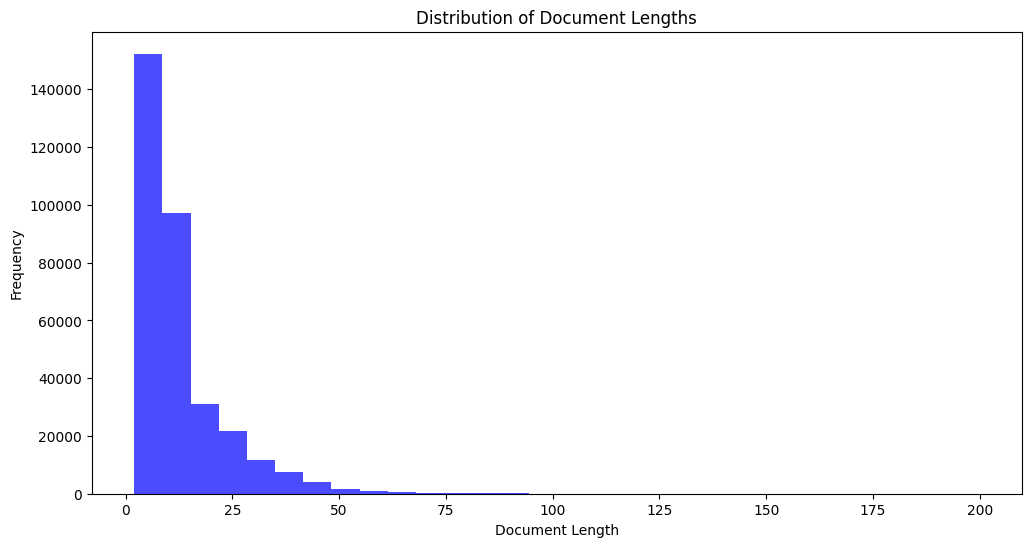

In [9]:
import matplotlib.pyplot as plt

# Document lengths
document_lengths_par = [len(sentence) for sentence in tokenized_sentences_par]
document_lengths_que = [len(sentence) for sentence in tokenized_sentences_que]
document_lengths_ans = [len(sentence) for sentence in tokenized_sentences_ans]

# Combine all document lengths into a single list
all_document_lengths = document_lengths_par + document_lengths_que + document_lengths_ans

# Plot histograms
plt.figure(figsize=(12, 6))

#plt.subplot(1, 2, 1)
plt.hist(all_document_lengths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Frequency')




### Embedding


In [10]:
from gensim.models.word2vec import Word2Vec
#parameter equal to the class exampale no really a choice
model_par = Word2Vec(tokenized_sentences_par, vector_size=30, min_count=5, window=10)
model_que = Word2Vec(tokenized_sentences_que, vector_size=30, min_count=5, window=10)
model_ans = Word2Vec(tokenized_sentences_ans, vector_size=30, min_count=5, window=10)

#embedding for the full model
model_all = Word2Vec(all_tokenized_sentences,vector_size=30,min_count=5,window=10)

In [11]:
#vocabolary used by Word2Vec:
print(len(model_par.wv))
print(len(model_que.wv))
print(len(model_ans.wv))
print("Full model \n",len(model_all.wv))

23368
13829
6987
Full model 
 30852


In [12]:
#random tests
term = 'beyonce'
model_all.wv.most_similar(term)

[('beyoncé', 0.9587403535842896),
 ('madonna', 0.8777399659156799),
 ('kanye', 0.8744392991065979),
 ('solo', 0.8737894296646118),
 ('destiny', 0.8715434074401855),
 ('spielberg', 0.8517381548881531),
 ('album', 0.8383715152740479),
 ('chopin', 0.8346837759017944),
 ('jay', 0.8085450530052185),
 ('lee', 0.800643801689148)]

Visualitation

In [13]:
import random

sample = random.sample(list(model_all.wv.key_to_index), 500)
word_vectors = model_all.wv[sample]
word_vectors

array([[ 4.7096636e-02, -7.4478924e-01, -7.9071254e-01, ...,
        -5.6554645e-01, -1.5340681e+00, -8.5502662e-02],
       [-1.9429962e-01,  1.8934861e-01,  2.1330456e-01, ...,
        -7.6411955e-02,  4.1729458e-02,  9.6413092e-04],
       [-4.4389587e-02, -6.2990360e-02,  3.2467946e-01, ...,
         5.6100518e-01, -5.1809990e-01, -2.5135544e-01],
       ...,
       [ 1.2351947e-01,  6.9122605e-02,  2.9966709e-01, ...,
         7.8839317e-02, -3.2832921e-01, -2.2938886e-01],
       [-1.0435564e-01,  2.7176303e-01, -3.6306683e-02, ...,
        -1.6782263e-01, -1.1365280e+00, -1.0860794e+00],
       [-6.3861303e-02,  2.6840016e-02, -6.8221629e-02, ...,
        -1.8906994e-02, -1.9340575e-01, -4.5284100e-02]], dtype=float32)

In [15]:

from sklearn.manifold import TSNE
import numpy as np
import plotly.express as px

tsne = TSNE(n_components=3, n_iter=2000)
tsne_embedding = tsne.fit_transform(word_vectors);


In [16]:
x, y, z = np.transpose(tsne_embedding)
fig = px.scatter_3d(x=x[:200],y=y[:200],z=z[:200],text=sample[:200])
fig.update_traces(marker=dict(size=3,line=dict(width=2)),textfont_size=10)
fig.show()

## PLAYGROUND DIRECT IMPORT FROM HUGGING FACE


In [17]:
#This import the data from the datasets library of hugging face and already set-up it in a dataset with context and answer
#No idea of the version of the data and validity of it (google colab notebook with youtibe video of Hugging Face on the matter)
from datasets import load_dataset

raw_datasets = load_dataset("squad")
raw_datasets = raw_datasets.remove_columns(["id", "title"])

def prepare_data(example):
    answer = example["answers"]["text"][0]
    example["answer_start"] = example["answers"]["answer_start"][0]
    example["answer_end"] = example["answer_start"] + len(answer)
    return example

raw_datasets = raw_datasets.map(prepare_data, remove_columns=["answers"])
raw_datasets["train"]

C:\Users\simon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



Dataset({
    features: ['context', 'question', 'answer_start', 'answer_end'],
    num_rows: 87599
})